#Calculating sentiment using nltk

In [ ]:
import regex as re
import nltk
from textblob import TextBlob, Word, Blobber
import json
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

class Sentiment:
  def __init__(self):
    self.HN=0
    self.N=0
    self.Neu=0
    self.P=0
    self.HP=0
    self.tweet_list=[]

  def cleantext(self,text):
    #print(text)
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

  def tweetsenti(self,text):
    cleaned_text=self.cleantext(text)
    self.tweet_list.append(text)
    txtblob=self.txtblobsenti(cleaned_text)
    result=self.nltksenti(cleaned_text)

    if cleaned_text!="":
      print(cleaned_text)
      if result['compound']==0 or (result['compound']>0 and  txtblob[0]==0):
        self.Neu=self.Neu+1
      elif result['compound']>0 and result['compound']<0.5 and txtblob[0]>0 or (result['compound']>=0.5 and (txtblob[0]<0.5 and txtblob[0]>0)):
        self.P=self.P+1

      elif result['compound']>=0.5 and txtblob[0]>=0.5:
        self.HP=self.HP+1
        
      elif result['compound']<0 and result['compound']>-0.5 or (txtblob[0]<0 and txtblob[0]>-0.5) :
        self.N=self.N+1
    
      elif result['compound']<=0.5 or txtblob[0]<=0.5:
        self.HN=self.HN+1
    return (self.P,self.HP,self.Neu,self.N,self.HN)

  def nltksenti(self,text):
    sia = SentimentIntensityAnalyzer()
    result=sia.polarity_scores(text)
    print(result)
    return result

  def txtblobsenti(self,text):
    text = TextBlob(text)
    #print(text.sentiment[0])
    return text.sentiment
  
  def usertimelinesenti(self,path):
    f = open(path,) 
    data = json.load(f)
    for tweet in data:
      (P,HP,Neu,N,HN)=self.tweetsenti(tweet['text'])
      print((P,HP,Neu,N,HN))
      (P,HP,Neu,N,HN)=(0,0,0,0,0)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/articleavgsentiment.csv")

#Importing modules for Named entity recongnition


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Putting Real News text info into a dictionary

In [ ]:
import os
import json
m=[]
cn=0
cy=0
for folder in os.listdir('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real'):
  print(folder)
  if folder in list(real['name']):
    for subf in os.listdir('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real'+"/"+str(folder)):
      if str(subf)=="tweets":
        c=0
        articles={}
        
        for files in os.listdir('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real'+"/"+str(folder)+"/"+subf):
          f=open('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/real'+"/"+str(folder)+"/"+subf+"/"+files)
          d={}
          c+=1
          data=json.load(f)
          if data['text']!="":
            cleaned=test.cleantext(data['text'])
            files=files.rstrip('.json')
            #print(files)
            if cleaned!="":
              """
              vb=0
              nn=0
              jj=0
              token = word_tokenize(cleaned.lower())
              s=nltk.pos_tag(token)
              for pos in s:
                if len(str(pos[0]))>1:
                  if 'VB' in str(pos[1]):
                    vb+=1
                  if 'NN' in str(pos[1]):     
                    nn+=1
                  if 'JJ' in str(pos[1]):
                    jj+=1
              #print(s)
              d['id']=files
              d['Verb count']=vb
              d['Noun count']=nn
              d['Adjective count']=jj
              """
              PERSON=0
              NORP=0
              ORG=0
              GPE=0
              doc = nlp(cleaned)
              for ent in doc.ents:
                print(ent.text,ent.label_)
                if ent.label_=="PERSON":
                  PERSON+=1
                elif ent.label_=="NORP":
                  NORP+=1
                elif ent.label_=="ORG":
                  ORG+=1
                else:
                  GPE+=1
                
              
              d['id']=files
              d['senti']=test.txtblobsenti(cleaned)[0]
              d['label']=0
              d['PERSON']=PERSON
              d['NORP']=NORP
              d['GPE']=GPE
              d['ORG']=ORG
              print(d)
              m.append(d)
              
        
        """
        if c>0:
          
          articles['name']=folder
          articles['sentiment']=overallsenti/c
          articles['label']=0      
          arti_sentiment.append(articles)
        #print("SENTI",overallsenti/c)
        """
      print("\n")
  

Streaming output truncated to the last 5000 lines.
Obama CARDINAL
{'id': '1019355021392130049', 'senti': 0.0, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 1, 'ORG': 0}
Obama CARDINAL
{'id': '1019363107175575552', 'senti': 0.0, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 1, 'ORG': 0}
Obama CARDINAL
{'id': '1019387966450479105', 'senti': 0.0, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 1, 'ORG': 0}
Obama CARDINAL
{'id': '1019355075758710785', 'senti': 0.0, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 1, 'ORG': 0}
2018 DATE
Nelson Mandela PERSON
{'id': '1019386791063965697', 'senti': 0.0, 'label': 0, 'PERSON': 1, 'NORP': 0, 'GPE': 1, 'ORG': 0}
{'id': '1019363158954270721', 'senti': 0.5, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 0, 'ORG': 0}
{'id': '1019357952543780865', 'senti': 0.0, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 0, 'ORG': 0}
Obama CARDINAL
{'id': '1019373718114430976', 'senti': 0.0, 'label': 0, 'PERSON': 0, 'NORP': 0, 'GPE': 1, 'ORG': 0}
2018 DATE
Nelson Mandela PERSON
{'id': '10

Puttin gFake news into a dictionary

In [ ]:
import os
import json
cn=0
cy=0
for folder in os.listdir('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake'):
  print(folder)
  if folder in list(fake['name']):
    for subf in os.listdir('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake'+"/"+str(folder)):
      if str(subf)=="tweets":
        c=0
        articles={}
        
        for files in os.listdir('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake'+"/"+str(folder)+"/"+subf):
          f=open('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/politifact/fake'+"/"+str(folder)+"/"+subf+"/"+files)
          d={}
          c+=1
          data=json.load(f)
          if data['text']!="":
            cleaned=test.cleantext(data['text'])
            files=files.rstrip('.json')
            #print(files)
            if cleaned!="":
              """
              vb=0
              nn=0
              jj=0
              token = word_tokenize(cleaned.lower())
              s=nltk.pos_tag(token)
              for pos in s:
                if len(str(pos[0]))>1:
                  if 'VB' in str(pos[1]):
                    vb+=1
                  if 'NN' in str(pos[1]):     
                    nn+=1
                  if 'JJ' in str(pos[1]):
                    jj+=1
              #print(s)
              d['id']=files
              d['Verb count']=vb
              d['Noun count']=nn
              d['Adjective count']=jj
              """
              PERSON=0
              NORP=0
              ORG=0
              GPE=0
              doc = nlp(cleaned)
              for ent in doc.ents:
                print(ent.text,ent.label_)
                if ent.label_=="PERSON":
                  PERSON+=1
                elif ent.label_=="NORP":
                  NORP+=1
                elif ent.label_=="ORG":
                  ORG+=1
                else:
                  GPE+=1
                
              
             
              d['PERSON']=PERSON
              d['NORP']=NORP
              d['GPE']=GPE
              d['ORG']=ORG
              d['id']=files
              d['senti']=test.txtblobsenti(cleaned)[0]
              d['label']=1
              print(d)
              m.append(d)
             
        
        """
        if c>0:
          
          articles['name']=folder
          articles['sentiment']=overallsenti/c
          articles['label']=0      
          arti_sentiment.append(articles)
        #print("SENTI",overallsenti/c)
        """
      print("\n")
  

Converting dictionary to dataframe

In [ ]:
NER_data=pd.DataFrame.from_dict(m)

In [ ]:
NER_data.head()

,id,senti,label,PERSON,NORP,GPE,ORG
0,494475371278909441,-0.500000,0,0,0,0,0
1,494480095512248320,-0.533333,0,0,0,0,0
2,494476039628673024,-0.533333,0,0,0,0,0
3,494514485957525504,-0.500000,0,0,0,0,1
4,494479344186585089,-0.500000,0,0,0,0,0


Saving into a csv file

In [ ]:
NER_data.to_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/nerdata.csv")

In [ ]:
import pandas as pd
NER_DATA=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/nerdata.csv")

In [ ]:

data=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/verbsnounsadjective.csv")

In [ ]:
int_df = pd.merge(NER_DATA,data,how='inner', on=['id'])

In [ ]:
int_df.head()

,Unnamed: 0_x,id,senti,label_x,PERSON,NORP,GPE,ORG,Unnamed: 0_y,Verb count,Noun count,Adjective count,label_y
0,0,494475371278909441,-0.500000,0,0,0,0,0,0,1,2,2,0
1,1,494480095512248320,-0.533333,0,0,0,0,0,1,2,3,4,0
2,2,494476039628673024,-0.533333,0,0,0,0,0,2,2,5,3,0
3,3,494514485957525504,-0.500000,0,0,0,0,1,3,1,4,2,0
4,4,494479344186585089,-0.500000,0,0,0,0,0,4,1,4,1,0


In [ ]:
int_df=int_df.drop(columns=['label_x','Unnamed: 0_x','Unnamed: 0_y'])

In [ ]:
int_df.head()

,id,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,label_y
0,494475371278909441,-0.500000,0,0,0,0,1,2,2,0
1,494480095512248320,-0.533333,0,0,0,0,2,3,4,0
2,494476039628673024,-0.533333,0,0,0,0,2,5,3,0
3,494514485957525504,-0.500000,0,0,0,1,1,4,2,0
4,494479344186585089,-0.500000,0,0,0,0,1,4,1,0


In [ ]:
#send to csv file
int_df.to_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/textdata.csv")

#EDA


In [ ]:
import pandas as pd
textdata=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/textdata.csv")

In [ ]:
textdata=textdata.drop(columns=['Unnamed: 0'])

In [ ]:
textdata.head()

,id,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,label_y
0,494475371278909441,-0.500000,0,0,0,0,1,2,2,0
1,494480095512248320,-0.533333,0,0,0,0,2,3,4,0
2,494476039628673024,-0.533333,0,0,0,0,2,5,3,0
3,494514485957525504,-0.500000,0,0,0,1,1,4,2,0
4,494479344186585089,-0.500000,0,0,0,0,1,4,1,0


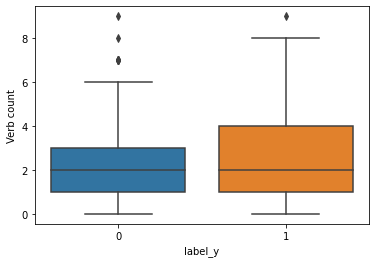

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#fig, axes = plt.subplots(4, 2, figsize=(18, 10))


#sns.scatterplot(ax=axes[0, 0], data=textdata, x='label_y', y='senti')
sns.boxplot(data=textdata, x='label_y', y='Verb count')
#sns.boxplot(data=textdata, x='label_y', y='Noun count')
#sns.boxplot(data=textdata, x='label_y', y='Adjective count')
#sns.scatterplot(ax=axes[2, 0], data=textdata, x='label_y', y='PERSON')
#sns.scatterplot(ax=axes[2, 1], data=textdata, x='label_y', y='NORP')
#sns.scatterplot(ax=axes[3, 0], data=textdata, x='label_y', y='GPE')
#sns.scatterplot(ax=axes[3, 1], data=textdata, x='label_y', y='ORG')



#Combining Text with the rest of the features

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_fol_main.csv")


In [ ]:
textdata.head()

,id,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,label_y
0,494475371278909441,-0.500000,0,0,0,0,1,2,2,0
1,494480095512248320,-0.533333,0,0,0,0,2,3,4,0
2,494476039628673024,-0.533333,0,0,0,0,2,5,3,0
3,494514485957525504,-0.500000,0,0,0,1,1,4,2,0
4,494479344186585089,-0.500000,0,0,0,0,1,4,1,0


In [ ]:
df.describe()

,Unnamed: 0,Article_id,Tweet_id,User_id,acc_tweet_time,art_tweet_time,art_acc_time,Label,followers_count,friends_count,statuses_count
count,1350.000000,1350.000000,1.350000e+03,1.350000e+03,1.350000e+03,1.350000e+03,1.350000e+03,1350.000000,1.129000e+03,1129.000000,1.129000e+03
mean,674.500000,13630.205185,8.562588e+17,1.229682e+17,1.545065e+08,2.868146e+07,-1.258251e+08,0.894074,4.991035e+04,2795.337467,7.065684e+04
std,389.855743,3515.432504,1.428239e+17,2.927053e+17,8.908458e+07,8.224306e+07,1.131240e+08,0.307857,1.355683e+06,6540.946607,1.844373e+05
min,0.000000,513.000000,3.317999e+17,8.070950e+05,1.243000e+03,-1.859993e+07,-3.304299e+08,0.000000,0.000000e+00,0.000000,2.000000e+00
25%,337.250000,13806.000000,7.754538e+17,7.759311e+07,7.272590e+07,-1.234860e+05,-2.138384e+08,1.000000,9.900000e+01,231.000000,8.007000e+03
50%,674.500000,14328.000000,8.805202e+17,4.594939e+08,1.625056e+08,7.843150e+04,-1.349708e+08,1.000000,5.850000e+02,966.000000,2.391600e+04
75%,1011.750000,15280.000000,9.729419e+17,2.656898e+09,2.283448e+08,5.891988e+05,-4.770215e+07,1.000000,2.936000e+03,2959.000000,7.602800e+04
max,1349.000000,15591.000000,1.068794e+18,1.014714e+18,3.589995e+08,3.193802e+08,3.013750e+08,1.000000,4.540923e+07,116605.000000,3.467094e+06


In [ ]:
data.head()


,Unnamed: 0,id,Verb count,Noun count,Adjective count,label
0,0,494475371278909441,1,2,2,0
1,1,494480095512248320,2,3,4,0
2,2,494476039628673024,2,5,3,0
3,3,494514485957525504,1,4,2,0
4,4,494479344186585089,1,4,1,0


In [ ]:
plt.title('Verb count')
sns.boxplot(x="label",y="sentiment",data=data)

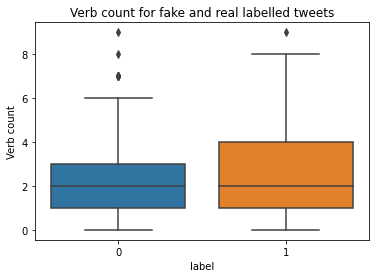

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Verb count for fake and real labelled tweets')
sns.boxplot(x="label",y="Verb count",data=data)



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/Combined_timeline_labelled_time.csv")

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,User_id,Tweet_id,Time_acc_tweet,followers_count,friends_count,statuses_count,interacted_with_fake,interacted_with_real
0,0,0,255637301,1237756123798745089,285622350.0,852.0,719.0,62227.0,0.0,1.0
1,1,1,255637301,1237756042387361793,285622331.0,852.0,719.0,62227.0,0.0,1.0
2,2,2,255637301,1237755941883346946,285622307.0,852.0,719.0,62227.0,0.0,1.0
3,3,3,255637301,1237755621618995202,285622231.0,852.0,719.0,62227.0,0.0,1.0
4,4,4,255637301,1237755147088003072,285622118.0,852.0,719.0,62227.0,0.0,1.0


In [ ]:
print(len(df['User_id']))

767695


In [ ]:
Userid=df['User_id']
Tweetid=df['Tweet_id']
c=0
verb=[]
noun=[]
adj=[]
import os
import json
for file in os.listdir("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/user_timeline_tweets"):
  f=open('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/user_timeline_tweets/'+str(file))
  d=json.load(f)
  for tweet in d:
    if tweet['id']==Tweetid[c] and tweet['user']['id']==Userid[c]:
      print(tweet['text'])
      cleaned=test.cleantext(tweet['text'])
      if cleaned=="":
        vb=0
        n=0
        ad=0
      else:
        vb=0
        n=0
        ad=0
        token = word_tokenize(cleaned.lower())
        s=nltk.pos_tag(token)
        for pos in s:
          if len(str(pos[0]))>1:
            if 'VB' in str(pos[1]):
              vb+=1
            if 'NN' in str(pos[1]):     
              n+=1
            if 'JJ' in str(pos[1]):
              ad+=1
      verb.append(vb)
      noun.append(n)
      adj.append(adj)
      c+=1

In [ ]:
df['Verbcount']=verb
df['Nouncount']=noun
df['Adjectivecount']=adj

In [ ]:
df.head()

In [ ]:
df.to_csv("")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'User_id', 'Tweet_id', 'Time_acc_tweet',
       'followers_count', 'friends_count', 'statuses_count',
       'interacted_with_fake', 'interacted_with_real'],
      dtype='object')

In [ ]:
c=0
usersentilist=[]

for i in df['User_id']:
  f=open('/content/drive/MyDrive/BTECH_PRO_COE1,29,48/FakeNewDet-FYP/code/fakenewsnet_dataset/user_timeline_tweets/'+str(i)+'.json')
  d=json.load(f)
  print(df.iloc[c,3])  
  for j in d:
    if j['id']==df.iloc[c,3]:
      cleaned=test.cleantext(j['text'])
      k=test.txtblobsenti(cleaned)
      usersentilist.append(k[0])
  c+=1

In [ ]:
def writetotext(filename,rec_res):
#input directory that contains the scanned images
  input_dir= '/content/gdrive/MyDrive/textjpgs/'
  filename=filename.lstrip(input_dir)

  #output directory where the txt file will be saved
  directory= "/content/gdrive/MyDrive/Paddle_OCR/PaddleOCR/inference_results/text_txt/"

  outfile=directory+filename+".txt"
  f=open(outfile,'w')
  for text in rec_res:
    f.write(text+'\n')
  f.close()

#Sentiment analysis

In [ ]:
import pandas as pd
data1=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/time_fol_text.csv")


In [ ]:
data1.head()

,Unnamed: 0,Article_id,Tweet_id,User_id,acc_tweet_time,art_tweet_time,art_acc_time,Label,followers_count,friends_count,statuses_count,Verb count,Noun count,Adjective count
0,0,513,1019342286893801480,2964254435,111309433.0,319369034.0,208059601.0,0,1681.0,699.0,14184.0,2.0,4.0,0.0
1,1,513,1019334214460821504,1978998907,149496448.0,319367109.0,169870661.0,0,40.0,117.0,5917.0,2.0,6.0,1.0
2,2,513,1019330010279239680,259380130,232852005.0,319366107.0,86514102.0,0,1135.0,1592.0,100413.0,2.0,7.0,2.0
3,3,513,1019330809688461319,295632077,226920458.0,319366297.0,92445839.0,0,565.0,282.0,72348.0,0.0,4.0,1.0
4,4,513,1019329269166673920,1978998907,149495269.0,319365930.0,169870661.0,0,40.0,117.0,5917.0,2.0,6.0,1.0


In [ ]:
senti_data.head()

,Unnamed: 0,id,senti,label
0,0,494475371278909441,-0.500000,0
1,1,494480095512248320,-0.533333,0
2,2,494476039628673024,-0.533333,0
3,3,494514485957525504,-0.500000,0
4,4,494479344186585089,-0.500000,0


In [ ]:
len(data1)

1350

In [ ]:
senti_data=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/sentiments.csv")

In [ ]:
senti_data.head()

,Unnamed: 0,Tweet_id,senti,label
0,0,494475371278909441,-0.500000,0
1,1,494480095512248320,-0.533333,0
2,2,494476039628673024,-0.533333,0
3,3,494514485957525504,-0.500000,0
4,4,494479344186585089,-0.500000,0


In [ ]:
NER_data = NER_data.rename(columns={'id': 'Tweet_id'})

In [ ]:
NER_data.head()
for i in range(0,len(NER_data)):
  NER_data.iloc[i]['Tweet_id']=np.float64(NER_data.iloc[i]['Tweet_id'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(type(NER_data.iloc[0]['Tweet_id']))

<class 'str'>


In [ ]:
int_df = pd.merge(data1,NER_data, how='inner', on=['Tweet_id'])
print(int_df)

In [ ]:
int_df.head()
int_df=int_df.drop(columns=['Unnamed: 0_x','Unnamed: 0_y','label'])
len(int_df)

1349

In [ ]:
int_df.head()

,Article_id,Tweet_id,User_id,acc_tweet_time,art_tweet_time,art_acc_time,Label,followers_count,friends_count,statuses_count,Verb count,Noun count,Adjective count,senti
0,513,1019342286893801480,2964254435,111309433.0,319369034.0,208059601.0,0,1681.0,699.0,14184.0,2.0,4.0,0.0,0.000000
1,513,1019334214460821504,1978998907,149496448.0,319367109.0,169870661.0,0,40.0,117.0,5917.0,2.0,6.0,1.0,0.136364
2,513,1019330010279239680,259380130,232852005.0,319366107.0,86514102.0,0,1135.0,1592.0,100413.0,2.0,7.0,2.0,0.136364
3,513,1019330809688461319,295632077,226920458.0,319366297.0,92445839.0,0,565.0,282.0,72348.0,0.0,4.0,1.0,0.000000
4,513,1019329269166673920,1978998907,149495269.0,319365930.0,169870661.0,0,40.0,117.0,5917.0,2.0,6.0,1.0,0.136364


In [ ]:
for tweetid in senti_data['id']:
  if tweetid==1019342286893801480:
    print("hi")
    break


hi


#Feature Selection with Modelling

In [ ]:
import pandas as pd
textdata=pd.read_csv("/content/drive/MyDrive/BTECH_PRO_COE1,29,48/textdata.csv", index_col = [0])

In [ ]:
textdata

,id,senti,PERSON,NORP,GPE,ORG,Verb count,Noun count,Adjective count,label_y
0,494475371278909441,-0.500000,0,0,0,0,1,2,2,0
1,494480095512248320,-0.533333,0,0,0,0,2,3,4,0
2,494476039628673024,-0.533333,0,0,0,0,2,5,3,0
3,494514485957525504,-0.500000,0,0,0,1,1,4,2,0
4,494479344186585089,-0.500000,0,0,0,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...
4588,755236203184676864,0.000000,1,0,0,0,5,6,1,1
4589,755229426871173120,0.000000,1,0,0,0,5,6,1,1
4590,755286149082521600,0.000000,1,0,0,0,5,6,1,1
4591,755240045053968384,0.000000,1,0,0,0,5,6,1,1


##Sentiment

In [ ]:
X = textdata[['senti']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

######Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=30).fit(X_train, y_train)

In [ ]:
model1.score(X_train, y_train)

0.6012520413718019

In [ ]:
model1.score(X_test, y_test)

0.6528835690968444

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.6216657593903103

In [ ]:
model2.score(X_test, y_test)

0.6724700761697497

#####Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression().fit(X_train, y_train)

In [ ]:
model3.score(X_train, y_train)

0.00197149260444629

In [ ]:
model3.score(X_test, y_test)

-0.009677485162373545

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6472509526401742

In [ ]:
model4.score(X_test, y_test)

0.6844396082698585

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6793685356559608

In [ ]:
model5.score(X_test, y_test)

0.70620239390642

#####K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

In [ ]:
model6.score(X_train,y_train)

0.673380511703865

In [ ]:
model6.score(X_test,y_test)

0.6659412404787813

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.6701143168209036

In [ ]:
model7.score(X_test, y_test)

0.6964091403699674

##Noun Count

In [ ]:
X = textdata[['Noun count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

######Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=30).fit(X_train, y_train)

In [ ]:
model1.score(X_train, y_train)

0.6951551442569407

In [ ]:
model1.score(X_test, y_test)

0.7040261153427638

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.6951551442569407

In [ ]:
model2.score(X_test, y_test)

0.7040261153427638

#####Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression().fit(X_train, y_train)

In [ ]:
model3.score(X_train, y_train)

0.1210643243001297

In [ ]:
model3.score(X_test, y_test)

0.0809135729508662

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6954273271638541

In [ ]:
model4.score(X_test, y_test)

0.7040261153427638

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6954273271638541

In [ ]:
model5.score(X_test, y_test)

0.7040261153427638

#####K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)

In [ ]:
model6.score(X_train,y_train)

0.5

In [ ]:
model6.score(X_test,y_test)

0.4896626768226333

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.6954273271638541

In [ ]:
model7.score(X_test, y_test)

0.7040261153427638

##Adjective count

In [ ]:
X = textdata[['Adjective count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

######Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=30).fit(X_train, y_train)

In [ ]:
model1.score(X_train, y_train)

0.5990745781164943

In [ ]:
model1.score(X_test, y_test)

0.6496191512513602

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.640990745781165

In [ ]:
model2.score(X_test, y_test)

0.6800870511425462

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.640990745781165

In [ ]:
model4.score(X_test, y_test)

0.6800870511425462

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.640990745781165

In [ ]:
model5.score(X_test, y_test)

0.6800870511425462

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.640990745781165

In [ ]:
model7.score(X_test, y_test)

0.6800870511425462

##Verb count

In [ ]:
X = textdata[['Verb count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.6622210125204138

In [ ]:
model2.score(X_test, y_test)

0.7007616974972797

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6624931954273272

In [ ]:
model4.score(X_test, y_test)

0.6996735582154516

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6624931954273272

In [ ]:
model5.score(X_test, y_test)

0.6996735582154516

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.6624931954273272

In [ ]:
model7.score(X_test, y_test)

0.6996735582154516

##Person

In [ ]:
X = textdata[['PERSON']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.5993467610234078

In [ ]:
model2.score(X_test, y_test)

0.6485310119695321

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.5993467610234078

In [ ]:
model4.score(X_test, y_test)

0.6485310119695321

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.5993467610234078

In [ ]:
model5.score(X_test, y_test)

0.6441784548422198

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.5993467610234078

In [ ]:
model7.score(X_test, y_test)

0.6485310119695321

##GPE

In [ ]:
X = textdata[['GPE']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.640446379967338

In [ ]:
model2.score(X_test, y_test)

0.6822633297062024

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.640446379967338

In [ ]:
model4.score(X_test, y_test)

0.6822633297062024

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.640446379967338

In [ ]:
model5.score(X_test, y_test)

0.6822633297062024

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.640446379967338

In [ ]:
model7.score(X_test, y_test)

0.6822633297062024

##NORP

In [ ]:
X = textdata[['NORP']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.6009798584648884

In [ ]:
model2.score(X_test, y_test)

0.6539717083786725

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.6009798584648884

In [ ]:
model4.score(X_test, y_test)

0.6539717083786725

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.6009798584648884

In [ ]:
model5.score(X_test, y_test)

0.6539717083786725

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.6009798584648884

In [ ]:
model7.score(X_test, y_test)

0.6539717083786725

##ORG

In [ ]:
X = textdata[['ORG']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

#####SVC

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
model2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
model2.score(X_train,y_train)

0.7046815459989113

In [ ]:
model2.score(X_test, y_test)

0.6724700761697497

#####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(max_depth=4, random_state=30)
model4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
model4.score(X_train,y_train)

0.7046815459989113

In [ ]:
model4.score(X_test, y_test)

0.6724700761697497

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7046815459989113

In [ ]:
model5.score(X_test, y_test)

0.6724700761697497

#####Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model7 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
model7.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [ ]:
model7.score(X_train,y_train)

0.7046815459989113

In [ ]:
model7.score(X_test, y_test)

0.6724700761697497

In the above individual feature modelling process, Algorithms are filtered considering their performance on the various features of the dataset.

**Gradient Boosting Algorithm** is used for further feature selection because from the above analysis, it can be seen as the best performing algorithm on our dataset.

#Combination of different textual features

##Sentiment, Noun count

In [ ]:
X = textdata[['senti', 'Noun count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

######Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7729994556341862

In [ ]:
model5.score(X_test, y_test)

0.763873775843308

##Sentiment, Noun count, Verb count

In [ ]:
X = textdata[['senti', 'Noun count', 'Verb count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.7972237343494829

In [ ]:
model5.score(X_test, y_test)

0.7932535364526659

##Sentiment, Noun count, Adjective count

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.799129014697877

In [ ]:
model5.score(X_test, y_test)

0.7997823721436343

##Sentiment, Noun count, Adjective count, Verb count

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count', 'Verb count']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.8317909635274905

In [ ]:
model5.score(X_test, y_test)

0.8335146898803046

##Sentiment, Noun count, Adjective count, Verb count, PERSON

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count', 'Verb count', 'PERSON']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.8238976592270005

In [ ]:
model5.score(X_test, y_test)

0.8204570184983678

##Sentiment, Noun count, Adjective count, Verb count, GPE

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count', 'Verb count', 'GPE']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.8358737071311921

In [ ]:
model5.score(X_test, y_test)

0.8302502720348205

##Sentiment, Noun count, Adjective count, Verb count, ORG

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count', 'Verb count', 'ORG']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.8405008165487208

In [ ]:
model5.score(X_test, y_test)

0.8302502720348205

##Sentiment, Noun count, Adjective count, Verb count, NORP

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count', 'Verb count', 'NORP']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.8301578660860098

In [ ]:
model5.score(X_test, y_test)

0.8313384113166485

##Sentiment, Noun count, Adjective count, Verb count, PERSON, NORP, ORG, GPE

In [ ]:
X = textdata[['senti', 'Noun count', 'Adjective count', 'Verb count', 'PERSON', 'NORP', 'ORG', 'GPE']]
Y = textdata['label_y']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.20, random_state=30)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=30).fit(X_train, y_train)

In [ ]:
model5.score(X_train,y_train)

0.864452912357104

In [ ]:
model5.score(X_test, y_test)

0.8683351468988031